In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/training.1600000.processed.noemoticon.csv.zip -P data
!unzip -n -d data data/training.1600000.processed.noemoticon.csv.zip

File ‘data/training.1600000.processed.noemoticon.csv.zip’ already there; not retrieving.

Archive:  data/training.1600000.processed.noemoticon.csv.zip


In [ ]:
import pandas as pd

df = pd.read_csv("data/training.1600000.processed.noemoticon.csv",
                names=['sentiment', 'id', 'date', 'query', 'user', 'text'],
                encoding='latin-1')
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df["sentiment"] = df["sentiment"].replace(4,1)


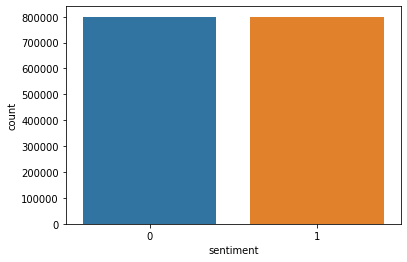

In [ ]:
# plotting the data using countplot
sns.countplot(x="sentiment",data=df)

In [ ]:
positive_tweets = df[df["sentiment"] == 1]["text"].tolist()


In [ ]:
# positive_tweets_string = " ".join(positive_tweets)
# positive_tweets_string
# plt.figure(figsize=(15,15))
# plt.imshow(WordCloud().generate(positive_tweets_string))

In [ ]:
# creating the string of negative tweets to analyze the words
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()
# negative_tweets_string = " ".join(negative_tweets)

In [ ]:
print(len(positive_tweets), len(negative_tweets))

800000 800000


In [ ]:
positive_tweets_some = positive_tweets[:2000]
negative_tweets_some = negative_tweets[:2000]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# remove stop words
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

stopwords_english = stopwords.words('english')

n_positive_tweets = []

# tokenize tweets
for tweet_str in positive_tweets_some:

  n_tweet_arr = []
  tokenizer = TweetTokenizer(preserve_case=False)
  tweet_arr = tokenizer.tokenize(tweet_str)
  for word in tweet_arr:
    if (word not in stopwords_english and word not in string.punctuation): 
      n_tweet_arr.append(word)

  n_positive_tweets.append(n_tweet_arr)


In [ ]:
# for negative_tweets

n_negative_tweets = []


count = 0
# tokenize tweets
for tweet_str in negative_tweets_some:
  n_tweet_arr = []
  tokenizer = TweetTokenizer(preserve_case=False)
  tweet_arr = tokenizer.tokenize(tweet_str)
  for word in tweet_arr:
    if (word not in stopwords_english and word not in string.punctuation): 
      n_tweet_arr.append(word)

  n_negative_tweets.append(n_tweet_arr)

In [ ]:
import nltk
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# lemmatizing positive_tweets
import nltk
nltk.download('wordnet')
# Instantiate stemming class

lem_positive_tweets = []

for tweet in n_positive_tweets:
  wordnet_lemmatizer = WordNetLemmatizer()
  tweet_lem = []

  for word in tweet:
    lem_words = wordnet_lemmatizer.lemmatize(word,pos ="v")
    tweet_lem.append(lem_words)

  lem_positive_tweets.append(tweet_lem)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# lemmatizing negative_tweets
import nltk
nltk.download('wordnet')
# Instantiate stemming class

lem_negative_tweets = []

for tweet in n_negative_tweets:
  wordnet_lemmatizer = WordNetLemmatizer()
  tweet_lem = []

  for word in tweet:
    lem_words = wordnet_lemmatizer.lemmatize(word,pos ="v")
    tweet_lem.append(lem_words)

  lem_negative_tweets.append(tweet_lem)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
n_positive_tweets[90]

['@marymayblood',
 'would',
 'love',
 'come',
 'help',
 'unpack',
 'let',
 'know',
 'need',
 'sat',
 'afternoon']

In [ ]:
lem_positive_tweets[90]

['@marymayblood',
 'would',
 'love',
 'come',
 'help',
 'unpack',
 'let',
 'know',
 'need',
 'sit',
 'afternoon']

In [ ]:
lem_negative_tweets[90]

['@hollywoodheat',
 'pay',
 'attention',
 'cover',
 'photoshop',
 'webpage',
 'design',
 'class',
 'undergrad']

In [ ]:
# converting [[''], [], [], ...] to ['', '', ...] for positive_tweets

lem_positive_tweets_string = []

for lem_tweet in lem_positive_tweets:
  lem_tweet_string = ' '.join([str(elem) for elem in lem_tweet])
  lem_positive_tweets_string.append(lem_tweet_string)

print(lem_positive_tweets_string[90])



@marymayblood would love come help unpack let know need sit afternoon


In [ ]:
# converting [[''], [], [], ...] to ['', '', ...] for negative_tweets

lem_negative_tweets_string = []

for lem_tweet in lem_negative_tweets:
  lem_tweet_string = ' '.join([str(elem) for elem in lem_tweet])
  lem_negative_tweets_string.append(lem_tweet_string)

print(lem_negative_tweets_string[90])


@hollywoodheat pay attention cover photoshop webpage design class undergrad


In [ ]:
print(lem_positive_tweets_string[89])

nikki work ass bike try recover knee injury good


In [ ]:
print(len(lem_positive_tweets_string), len(lem_negative_tweets_string), type(lem_positive_tweets_string[0]))

2000 2000 <class 'str'>


In [ ]:
data = []
data_labels = []

for word in lem_positive_tweets_string:
  data.append(word)
  data_labels.append(1)

for word in lem_negative_tweets_string:
  data.append(word)
  data_labels.append(0)

In [ ]:
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()
vectorizer.fit(data)
# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)
# Encode the Document
vector = vectorizer.transform(data).toarray()
# Summarizing the Encoded Texts
# print("Encoded Document is:")
# print(vector)

In [ ]:
df['sentiment'][:2000]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# train, test, train_y, test_y = train_test_split(vector_positive_tweets, df['sentiment'][:2000], test_size = 0.20, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(vector, data_labels, test_size = 0.2)


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.54375

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mln = MultinomialNB()
mln.fit(X_train, y_train)
mln.score(X_test, y_test)

0.7075

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
dt.score(X_test, y_test)

0.62875

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
logisticRegr.score(X_test, y_test)

0.6925